Linear Regression
- Equation 4-1. Linear Regression model prediction
    - y(hat) = θ_0 + θ_1.x_1 + θ_2.x_2 + ⋯ + θ_n.x_n
- Equation 4-2. Linear Regression model prediction (vectorized form)
    - y(hat) = h_θ(x) = θ.x
- The MSE of a Linear Regression hypothesis h_θ on a training set X is calculated as:
    - MSE(X, h_θ) = MSE X, hθ = 1/m.∑(m, i=1) (θ^T.x^(i) - y^(i))^2
- Normal Equation
    - θ(hat) = (X^TX)^-1 X^T y


Let's generate some linear looking data to test this equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


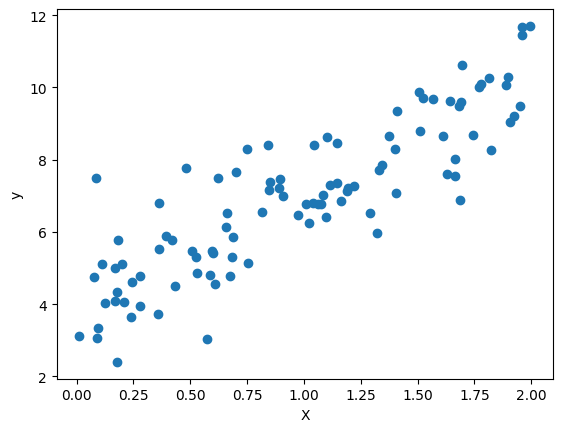

In [3]:
import matplotlib.pyplot as plt 

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()


Now let’s compute θ using the Normal Equation. We will use the inv() function from
NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and
the dot() method for matrix multiplication

- In linear regression, we want to fit a line: y = θ₀ + θ₁x₁
- But matrix multiplication only gives us: y = θ₁x₁ (missing the intercept θ₀)

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # Result: X_b has bias column (x₀=1) plus original features
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.90318294],
       [3.13120823]])

θ_0 = 3.95, θ_1 = 3.1
- we would,ve hope for θ_0 = 4, θ_0 = 3 but noise made it impossible to recover the exact parameters

In [5]:
# now we can make predictions using θ(hat)
X_new = np.array([[0], [2]]) # new test points
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.90318294],
       [10.1655994 ]])

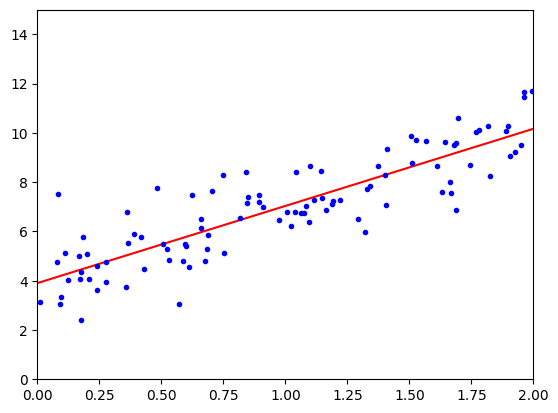

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

performing Linear Regression using Scikit-learn is simple

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([3.90318294]), array([[3.13120823]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.90318294],
       [10.1655994 ]])

Gradient Decent
- Batch gradient Descent: it uses the whole batch of training
data at every step (actually, Full Gradient Descent would probably
be a better name). As a result it is terribly slow on very large training sets 

    - Partial Derivatives of the cost function
        - D/Dθ_jMSE(θ) = 2/m.∑(m, i=1) (θ^T.x^(i) - y^(i)).x_j^(i)
    - Gradient Descent step
        - θ^(next step) = θ - n.∇_θ.MSE(θ)

In [9]:
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) # random init

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.90318294],
       [3.13120823]])

this is exactly what the Normal Equation found. Gradient Descent worked perfectly

- Side note: To find a good learning rate, you can use grid search (see Chapter 2). However, you
may want to limit the number of iterations so that grid search can eliminate models
that take too long to converge.
You may wonder how to set the number of iterations. If it is too low, you will still be
far away from the optimal solution when the algorithm stops; but if it is too high, you
will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.


Stochastic Gradient Descent
- The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a
random instance in the training set at every step and computes the gradients based
only on that single instance.

In [10]:
# implementation of SGD

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[3.87109096],
       [3.12899002]])

to perform Linear Regression using SGD with Scikit-learn
- The following code runs for maximum 1,000 epochs or until the loss drops by less
than 0.001 during one epoch (max_iter=1000, tol=1e-3). It starts with a learning rate
of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding
one). Lastly, it does not use any regularization (penalty=None; more details on this
shortly)

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.8996403]), array([3.18014069]))

Mini-batch Gradient Descent
- The last Gradient Descent algorithm we will look at is called Mini-batch Gradient
Descent. It is simple to understand once you know Batch and Stochastic Gradient
Descent: at each step, instead of computing the gradients based on the full training set
(as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD
computes the gradients on small random sets of instances called mini-batches. The
main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using
GPUs.

Polynomial Regression
- This comes handy when data is more complex than a straight line
- Surprisingly, can use a linear model to fit nonlinear data
- to add powers of each feature as new features, then train a linear model on this extended set of features

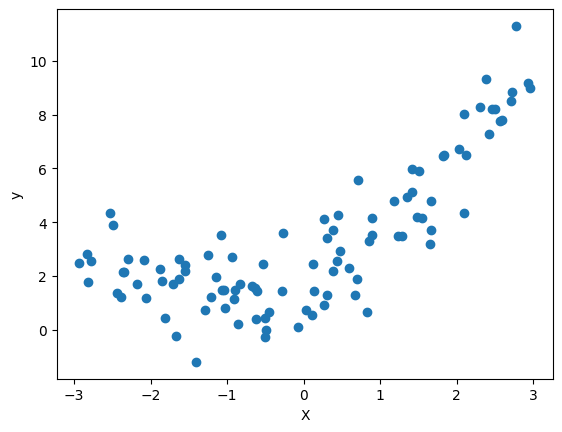

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures 
# transform our training data, adding the square (second-
# degree polynomial) of each feature in the training set as a new feature (in this case
# there is just one feature)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.4725788])

In [14]:
X_poly

array([[ 4.72578803e-01,  2.23330725e-01],
       [ 2.98362772e-01,  8.90203435e-02],
       [ 2.71279191e+00,  7.35923995e+00],
       [ 2.96197654e+00,  8.77330501e+00],
       [-2.38373557e+00,  5.68219526e+00],
       [-1.04628705e+00,  1.09471659e+00],
       [ 1.47649942e+00,  2.18005054e+00],
       [ 1.66607934e+00,  2.77582038e+00],
       [ 2.42077216e+00,  5.86013784e+00],
       [ 1.32905786e-01,  1.76639479e-02],
       [-5.11638507e-01,  2.61773962e-01],
       [ 2.68236722e-01,  7.19509388e-02],
       [ 3.45225614e-02,  1.19180725e-03],
       [ 1.50853000e+00,  2.27566277e+00],
       [ 3.85591153e-01,  1.48680537e-01],
       [ 2.57055813e+00,  6.60776910e+00],
       [ 2.45813696e+00,  6.04243734e+00],
       [-1.03343655e+00,  1.06799111e+00],
       [-1.15061237e+00,  1.32390883e+00],
       [-2.83102295e+00,  8.01469093e+00],
       [-1.21087934e+00,  1.46622877e+00],
       [ 7.03639902e-01,  4.95109111e-01],
       [ 2.09556182e+00,  4.39137936e+00],
       [-2.

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.85484766]), array([[1.13636444, 0.53808819]]))

Not bad: 
- the model estimates y = 0.47x1^2 + 0.95x1 + 2.11 
- when in fact the original function was y = 0.5x1^2 + 1.0x1 + 2.0 + Gaussian noise.

Learning Curves
- if to perform higher defree Polynomial Regression, likely fit the training data much better than with plain Linear Regression.
- e.g. 300-degree polynomial model: model is overfitting the training data, while the linear model is underfitting.
- the model generalize best would be the quadratic model

- how to tell overfitting or underfitting?
    - using cross-val to get an estimate of a model's generalization performance
    - if a model performs well on the training data but generalizes poorly according to cross-val metrics, then model is overfitting
    - if it performs poorly both, then it is underfitting

    - another way to tell is to look at the learning curves
        - these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set. 

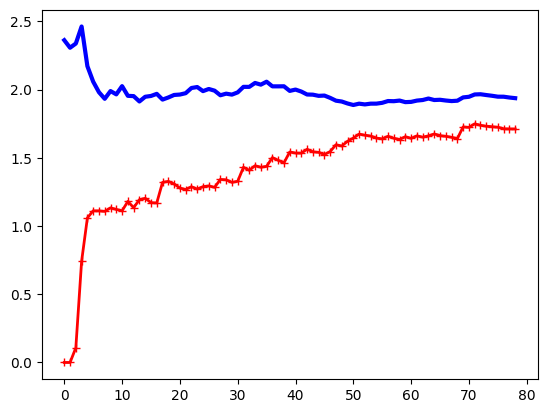

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Overfitting model characteristics:
- Training performance: Error continuously decreases as more data is added - model memorizes training examples perfectly.
- Validation performance: Initially decreases but then starts increasing as model becomes too complex and loses generalization ability.
- Key indicators of overfitting:

    - Large gap between training and validation curves
    - Training error very low, validation error high
    - Model too complex for the amount of training data
    - Validation error increases while training error keeps decreasing

Underfitting model characteristics:
- Training performance: Error starts at zero (fits few samples perfectly), then rises as more noisy, non-linear data is added, eventually plateauing.
- Validation performance: High initial error (poor generalization), slowly decreases as model sees more examples, but plateaus at similar level to training error.
- Key indicators of underfitting:

    - Both curves plateau at high error levels
    - Training and validation errors converge and remain close
    - Model too simple (straight line) for complex data (non-linear + noise)

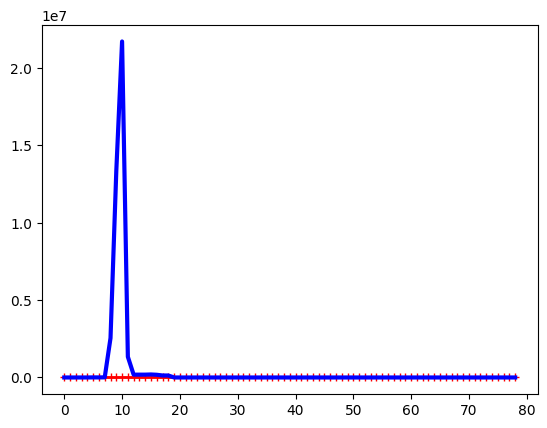

In [17]:
# 10th-degree polynomial model on the same data

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

- One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.
- If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

Regularized Linear Models
- a good way to reduce overfitting
- the fewer degrees of freedom it has, the harder it will be for it to overfit the data
- for a linear model, regularization is typically achieved by constraining the weights of the model

Rigde Regression
- Regularization term = cost function(MSE(θ)) + a.1/2.∑(i=1, n) θ_i^2
- hyperparameter a controls how much to regularize the model. If a=0 Rigde Regression=Linear Regression
    if a is too large, all weights end up very close to zero and the result is a flat line going thru the data's mean
- this forces the learning algorithm keep the model weights as small as possible
- θ(hat) = (X^TX + aA)^-1 X^T y => Ridge Regression closed-form solution


In [18]:
# performing closed form solution using sklearn that uses matrix factorization technique

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([5.07834834])

In [19]:
sgd_reg = SGDRegressor(penalty="l2") # "penalty=" hyperparameters sets the type of regularization term to use
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.05109242])

Lasso Regression
- Least Absolute Shrinkage and Selection Operator Regression
- same as Ridge but uses l1 norm of the weight vector instead of half the square of the l2 norm
- Regularization Term/Cost Function: cost function(MSE(θ)) + a.∑(i=1, n) |θ_i|
- an important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (=set them to zero)
- The Lasso cost function is not differentiable at θi = 0 (for i = 1, 2, ⋯, n), but Gradient Descent still works fine if you use a subgradient vector g13 instead when any θi = 0.

In [20]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.02929644])

In [21]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.04557329])

Elastic Net
- middle ground between Ridge and Lasso Regressions
- mix of both Ridge and Lasso's regularization terms, and controlling mix ratio r
- if r=0 Elastic Net = Ridge Regression
- if r=1 Elastic Net = Lasso Regression
- Regularization term/Cost function = cost function(MSE(θ)) + r.a.∑(i=1, n) |θ_i| + (1-r)/2.a.∑(i=1, n) θ_i^2


In [22]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.02523142])

When to use each regression method:

- Plain Linear Regression: Rarely recommended - avoid due to lack of regularization
- Ridge: Good default choice for most cases
- Lasso: When you suspect only a few features are useful (performs feature selection)
- Elastic Net: Generally preferred over Lasso, especially when:
    - Number of features > number of training instances
    - Several features are strongly correlated
    - You want both regularization and feature selection

- Bottom line: Start with Ridge as default, use Elastic Net when you need feature selection or have correlated features.

- Early Stopping: Stop training when validation error reaches its minimum, before it starts increasing again.
- How it works: As training progresses, both training and validation errors decrease initially. When validation error stops decreasing and starts rising (indicating overfitting), halt training immediately.
- Benefits: Simple, efficient regularization technique that prevents overfitting without added complexity - Geoffrey Hinton called it a "beautiful free lunch."

Logistic Regression
- Logistic Regression (also called Logit Regression) is commonly
used to estimate the probability that an instance belongs to a particular class (e.g.,
what is the probability that this email is spam?). If the estimated probability is greater
than 50%, then the model predicts that the instance belongs to that class (called the
positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to
the negative class, labeled “0”). This makes it a binary classifier.
- Logistic Function: σ(t) = 1 / (1 + exp^(-t))
- Logistic Regression model estimated probability: p(hat) = h_θ(x) = σ(x^T.θ)
- Logistic Regression model prediction:
    - y(hat) = 
        - 0, if p(hat)<0.5
        - 1, if p(hat)>=0.5

- Training and Cost Function
- Cost ffunction of a single training instance:
    - c(θ) = 
        - -log(p(hat)), if y=1
        - -log(1-p(hat)), if y=0

- The cost function over the whole training set is the average cost over all training
instances. It can be written in a single expression called the log loss
- Logistic Regression cost function(log loss)
    - -1/m.∑(i=1, m) [\y^(i).log(p(hat)^(i)) + (1-y^(i)).log(1-p(hat)^i)]

- The partial derivatives of the cost
function with regard to the jth model parameter θj:
    - logistic cost function partial derivatives
        - D/Dθj J(θ) = 1/m.∑(i=1, m) (σ(θ^Tx^(i)) - y^(i))x_j^(i)

how to compute gradients for logistic regression training:
- Key steps:

    - For each training instance, calculate prediction error × feature value
    - Average across all instances to get gradient vector with partial derivatives
    - Use this gradient in gradient descent algorithms

- Implementation variants:

    - Batch GD: Use all training instances
    - Stochastic GD: Use one instance at a time
    - Mini-batch GD: Use small batches

In [23]:
# let's use iris dataset to illustrate Logistic Regresison

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [24]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica, else 0

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


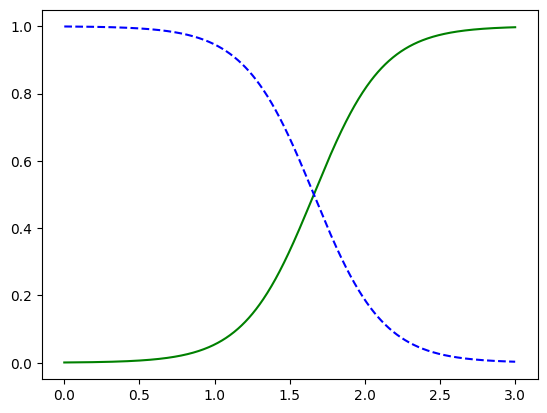

In [26]:
# Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 cm to 3 cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

If asking to predict the class using .predict(), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict that it is not (even if it is not very confident)

In [27]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Softmax Regression 
- Softmax Regression works by first calculating a score for each class.
- each class' its own parameter vectors are typically combined into a parameter matrix
- once these scores are computed, the softmax function is applied
- this function converts the scores into probabilities by exponentiating each score and then normalizing them by dividing by the sum of all exponentiated scores

- softmax function: p_k(hat) = σ(s(x))_k = exp(s_k(x)) / (∑(j=1, k) exp(s_j(x)))
    - k is the number of classes
    - s(x) is a vector containing the scores of each class for the instance x
    - σ(s(x))_k is the estimated probability that the instance x belongs to class k, given the score of each class for that instance
- Softmax Regression classifier predicts the class with the highest estimated probability
    - y(hat) = argmax__k σ(s(x))_k = argmax__k s_k(x) = argmax__k ((θ^(k))^T.x)
    - argmax operator returns the value of a variable that maximzes a function
    - in this equation it returns the value of k that maximizes the estimated probability σ(s(x))_k
- softmax regression classifier predicts only one class at a time

Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes
- Cross entropy cost function: J(Θ) = -1/m.∑(i=1, m) ∑(k=1, K) y_k^(i)log(p(hat)_k^(i))
    - y_k^(i) is the target probability that the ith instance belongs to class k. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.
- the gradient vector of this cost function: ∇_θ(k) J(θ) = 1/m.∑(i=1, m) (p(hat)_k^(i) - y_k^(i))x^(i)
    - Now you can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix Θ that minimizes the cost function.

Scikit-Learn’s LogisticRegression uses one-versus-the-rest by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression. You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation for more details). It also applies ℓ2 regularization by default, which you can control using the hyperparameter C

In [ ]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

In [29]:
softmax_reg.predict([[5, 2]])

array([2])

In [30]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])